In [2]:
import pandas as pd
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
import random
import jieba
import re

In [3]:
#1、数据加载，使用pd.read_excel读取excel数据
data=pd.read_excel('jobs_4k.xls', index_col=0)

In [4]:
#2、数据可视化，建立职位与能力之间的关系。
#2.1 获取职位数据
position_Name=data['positionName'].tolist()
#print(position_Name)

In [5]:
#2.2 获取能力数据
skill_Lables=data['skillLables'].tolist()
#print(skill_Lables)

In [6]:
#2.3 定义字典，建立职位与相应的能力需求之间的字典列表
skill_position_graph=defaultdict(list)
for p,s in zip(position_Name,skill_Lables):
    skill_position_graph[p]+=eval(s)
#print(skill_position_graph)

In [7]:
#2.4 使用Networkx可视化职位与能力的关系网络图
G=nx.Graph(skill_position_graph)
plt.rcParams['font.sans-serif']=['SimHei']#设置中文字体为黑体
plt.rcParams['axes.unicode_minus']=False #正常显示负号

In [8]:
#2.5 选取10个随机职位显示网络图
sample_nodes=random.sample(position_Name,k=10)
print(sample_nodes)

['测试工程师', '测试工程师', 'Python/Go研发工程师', '运维工程师', '产品经理', 'web前端开发', '软件测试工程师（黑盒测试）', '大数据产品经理', '高级测试开发工程师-效率中台', '测试经理']


In [9]:
#2.6 提取与随机10个职位相关的所有能力的节点
sample_nodes_connections=sample_nodes.copy()
for p in sample_nodes:
    sample_nodes_connections+=skill_position_graph[p]
print(sample_nodes_connections)

['测试工程师', '测试工程师', 'Python/Go研发工程师', '运维工程师', '产品经理', 'web前端开发', '软件测试工程师（黑盒测试）', '大数据产品经理', '高级测试开发工程师-效率中台', '测试经理', '测试', 'Android测试', 'IOS测试', 'Web测试', '测试', '测试', 'Android测试', 'IOS测试', '移动端', '移动端', '功能测试', '产品测试', '测试', '功能测试', '性能测试', '测试', 'IOS测试', '移动端', '功能测试', '性能测试', '功能测试', '测试', '测试', '功能测试', '测试', 'Android测试', 'IOS测试', 'Server端测试', 'Web测试', '测试', '功能测试', '产品测试', '测试', 'Loadrunner', 'Selenium', '自动化测试', '软件测试', '测试', '移动端', 'Web测试', '客户端', '功能测试', '客户端', 'Windows测试', '自动化测试', '接口测试', '性能测试', '功能测试', 'app测试', '功能测试', '移动端', '测试', 'Web测试', '测试', 'Web测试', '产品测试', '自动化测试', '测试', '性能测试', '应用软件测试', '系统软件测试', '自动化测试', '测试开发', '网页', '客户端', '功能测试', '自动化测试', '功能测试', '性能测试', '客户端', '测试', 'Web测试', 'Selenium', '功能测试', '测试', '测试', '测试', '产品测试', '功能测试', '测试', '测试', 'Web测试', '移动端', '功能测试', '自动化测试', '测试', '客户端', '移动端', '功能测试', 'app测试', '测试', '测试开发', '测试', '系统测试', '性能测试', '功能测试', '测试', '测试', '自动化', 'Android测试', 'IOS测试', '产品测试', '测试', '移动端', 'Android测试', 'IOS测试', 'app测试', '测试', '测试开发', '性能测

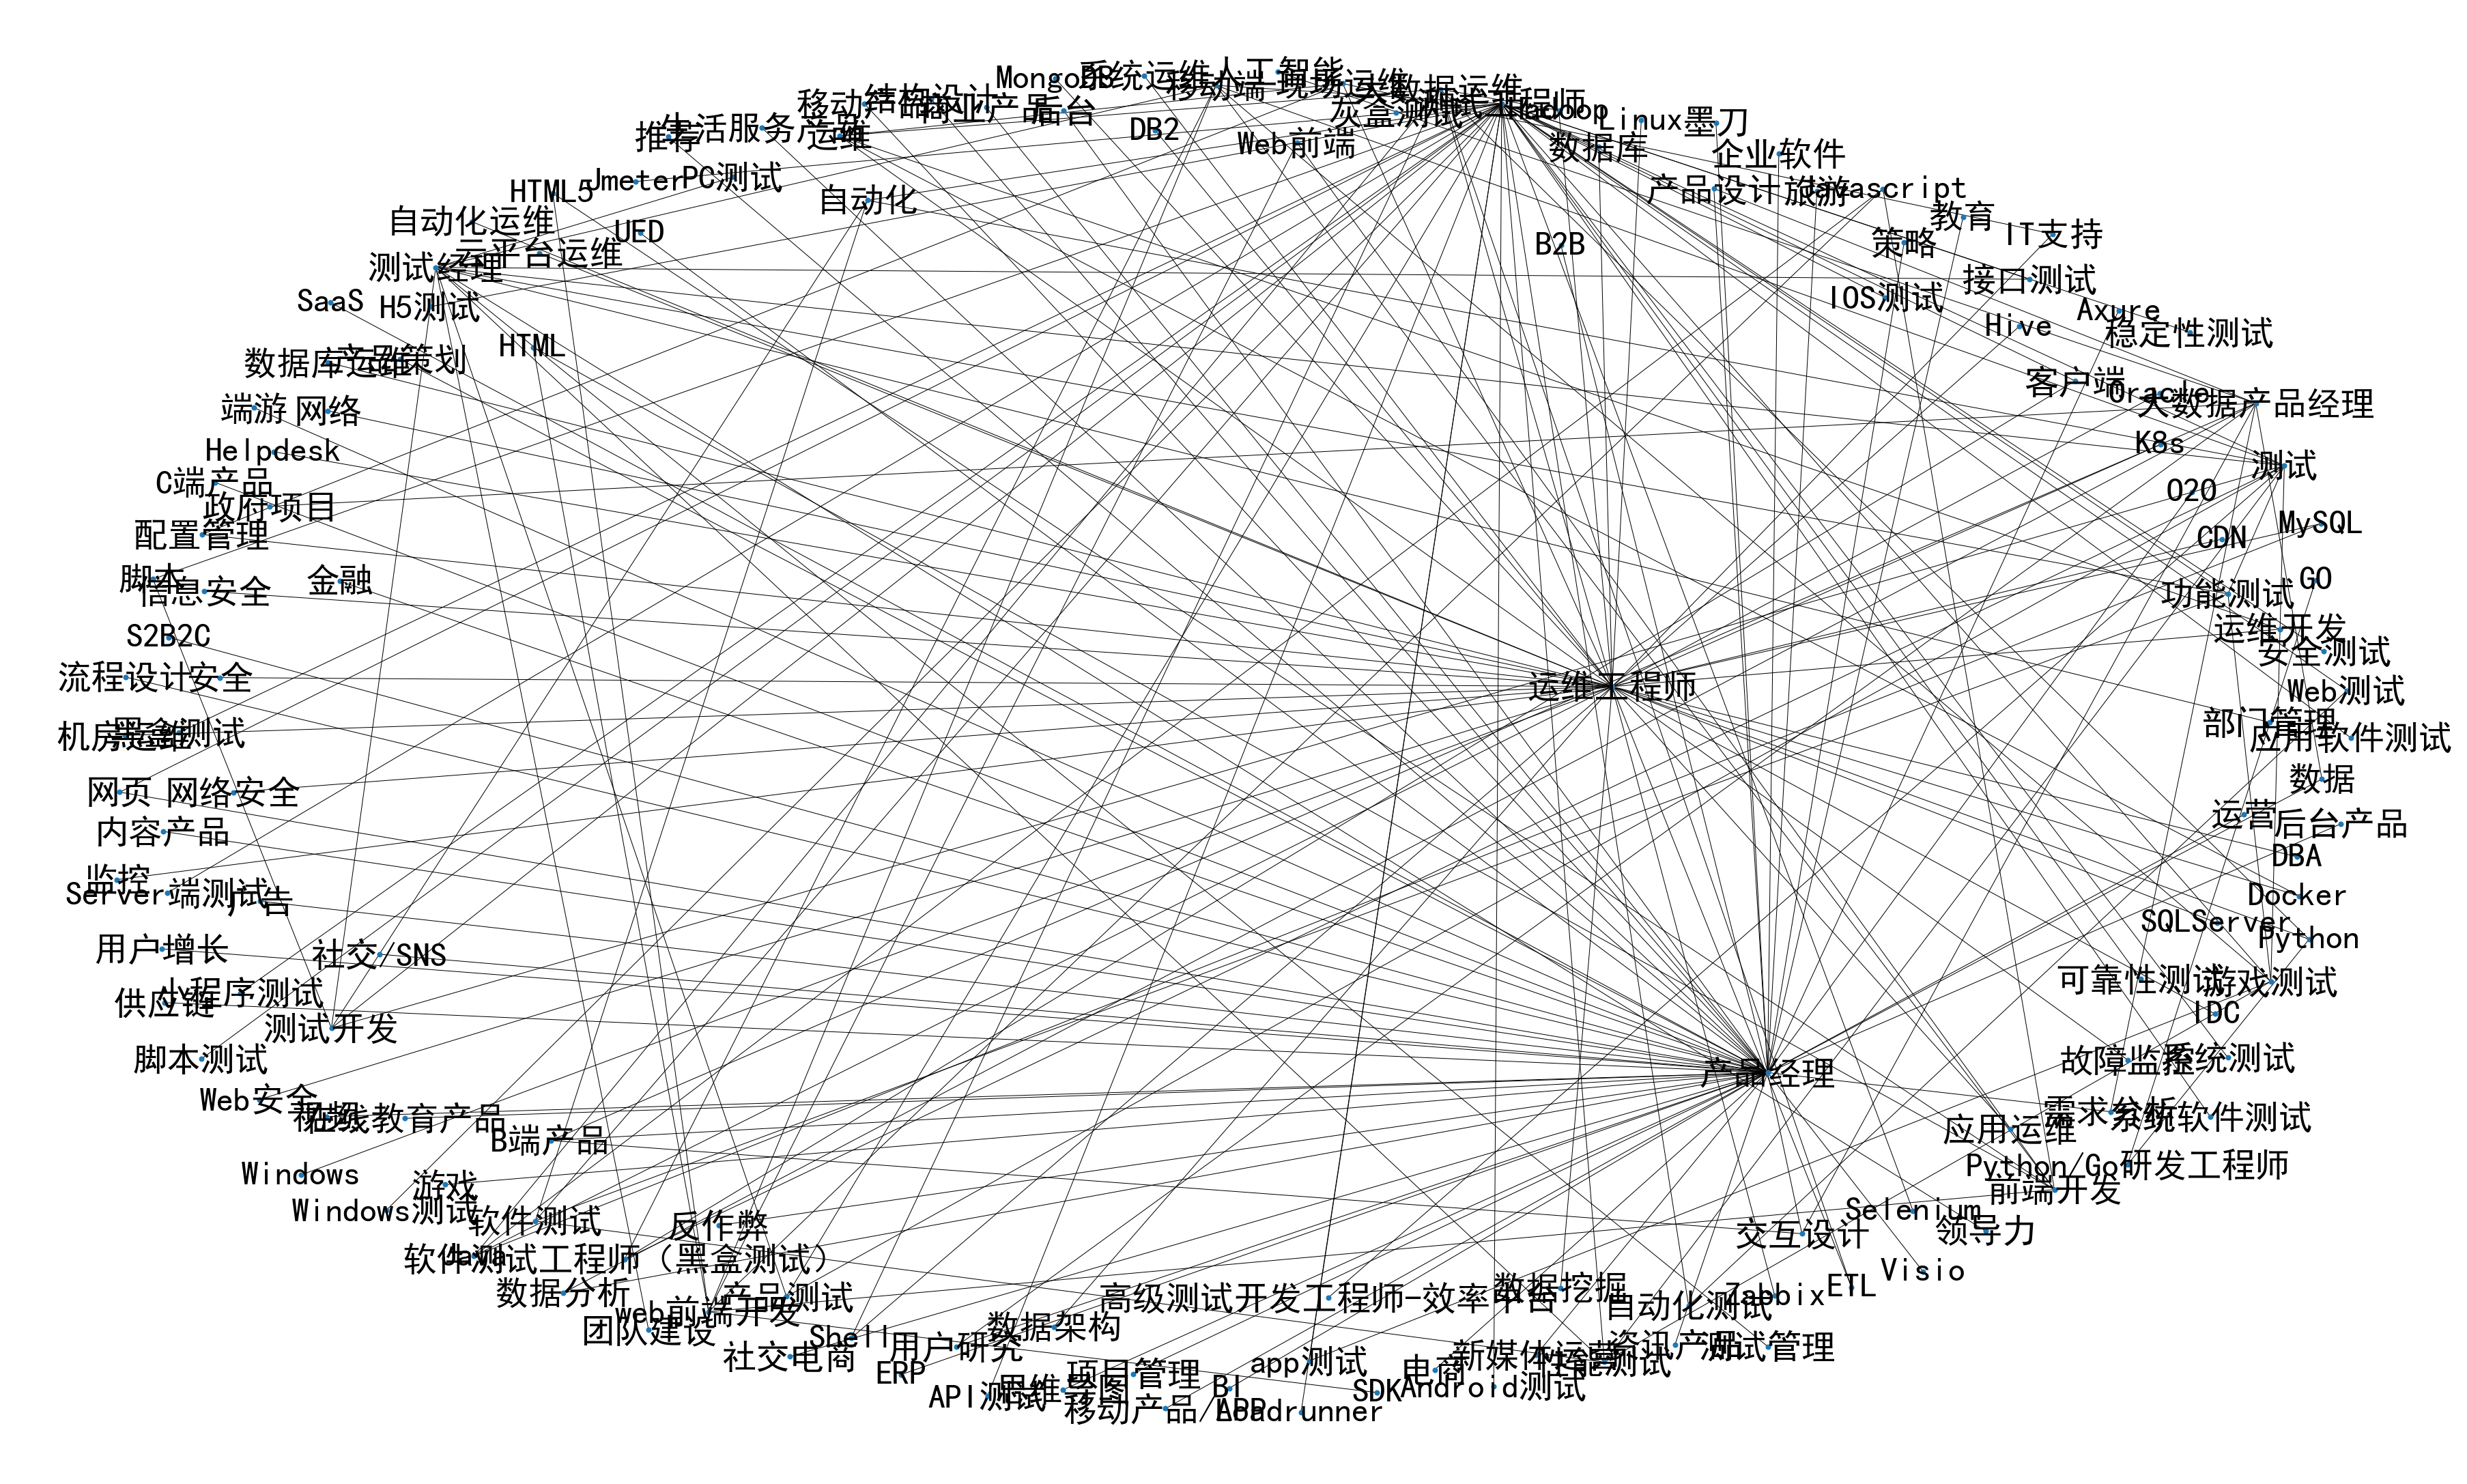

In [10]:
#2.7 绘制随机选择的职位和能力的网络关系图
sample_graph=G.subgraph(sample_nodes_connections)
plt.figure(figsize=(50,30))
pos=nx.spring_layout(sample_graph,k=3)
nx.draw(sample_graph,pos,with_labels=True,node_size=50,font_size=50)

In [11]:
#2.8 用pagerank算法，对核心能力和职位的影响力进行排序
pgrk=nx.pagerank(G,alpha=0.9)
ranked_position_and_ability=sorted([(name,value) for name,value in pgrk.items()],key=lambda x:x[1],reverse=True)
print(ranked_position_and_ability)

[('后端', 0.026833573370768898), ('运维', 0.0191279829833669), ('Python', 0.01716937562136133), ('PHP', 0.015217301132452196), ('Java', 0.015099988114363864), ('UI', 0.013501957339680843), ('产品经理', 0.012867362096047103), ('测试', 0.012366790452249686), ('交互', 0.009849405953488204), ('MySQL', 0.00967223844507533), ('服务器端', 0.009370964487301778), ('产品设计', 0.008597505637826748), ('数据分析', 0.007174969488981874), ('前端开发', 0.00608539791307318), ('Linux', 0.005226181617999156), ('Linux/Unix', 0.0049532559996417515), ('测试开发', 0.004835194902631713), ('Javascript', 0.004783639914662887), ('视觉', 0.004716109056529597), ('java开发工程师', 0.004700067816776761), ('GO', 0.004665757462546789), ('Web前端', 0.004611833602838623), ('运维工程师', 0.0043469981091009986), ('测试工程师', 0.00431809809115629), ('ui设计师', 0.004238235625166821), ('功能测试', 0.004037991593330988), ('产品总监', 0.003940470794231084), ('Golang', 0.003927858764196972), ('自动化', 0.0038575443596511397), ('UE', 0.0037940387389006924), ('产品策划', 0.0037544411990242357),

In [12]:
#3、进行文本特征提取
#3.1 将数据集中的salary字段作为目标target，其他字段作为特征X。
X_data=data.drop(['salary'],axis=1)
target=data['salary'].tolist()

In [13]:
#3.2 将所有的特征内容进行合并，并存入新建的merged字段
X_data['merged']=X_data.apply(lambda x:''.join(str(x)),axis=1)
X_string=X_data['merged'].tolist()

In [22]:
#3.3 定义函数，对merged字段的内容进一步清洗，将数据合并在一起，并去除不相关的字符
def get_one_row_job_string(X_string_row):
    job_string=''
    for i,element in enumerate(X_string_row.split('\n')):
        if len(element.split())==2:
            _,value=element.split()
            if i ==0:
                continue
            job_string+=value
    return job_string

def token(string):
    return re.findall('\w+',string)

print(get_one_row_job_string(X_string[0]))
print(token(get_one_row_job_string(X_string[0])))

海淀区上地全职物流丨运输,软件开发500-2000人北京福佑多多信息技术有限公司1-3年本科福利待遇好、创业黑马、技术氛围好https://www.lagou.com/jobs/7149613.html岗位职责1、负责财务相关业务解决方案架构并主导与产品、技术等交付团队的对接，能够从完整的财务...产品线
['海淀区上地全职物流丨运输', '软件开发500', '2000人北京福佑多多信息技术有限公司1', '3年本科福利待遇好', '创业黑马', '技术氛围好https', 'www', 'lagou', 'com', 'jobs', '7149613', 'html岗位职责1', '负责财务相关业务解决方案架构并主导与产品', '技术等交付团队的对接', '能够从完整的财务', '产品线']


In [23]:
#3.3 同上
cutted_X=[]
for i ,row in enumerate(X_string):
    job_string=get_one_row_job_string(row)
    cutted_X.append(' '.join(list(jieba.cut(''.join(token(job_string))))))
print(cutted_X)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.208 seconds.
Prefix dict has been built successfully.


['海淀区 上 地 全职 物流 丨 运输 软件开发 5002000 人 北京 福佑 多多 信息技术 有限公司 13 年 本科 福利待遇 好 创业 黑马 技术 氛围 好 httpswwwlagoucomjobs7149613html 岗位职责 1 负责 财务 相关 业务 解决方案 架构 并 主导 与 产品 技术 等 交付 团队 的 对接 能够 从 完整 的 财务 产品线', '海淀区 中关村 全职 企业 服务 5002000 人 北京 拉勾 网络 技术 有限公司 510 年 本科 做好 产品 给 用户 用 httpswwwlagoucomjobs7056930html 负责 具体 产品线 的 工作 完成 用户 价值 解决 具体 产品线 的 问题 产品线 有 策略 运营 基础 产品 流程 等线 产品线', '海淀区 中关村 全职 企业 服务 5002000 人 北京 拉勾 网络 技术 有限公司 510 年 本科 做好 产品 给 用户 用 httpswwwlagoucomjobs6982266html 做出 好 产品 服务 用户 实现 用户 价值 B 端 产品 C 端 产品 商业 策略 产品 运营 产品 等 岗位 都 有 总 产品线', '海淀区 东单 全职 文娱 丨 内容 2000 人 以上 产品 运营 北京 达佳 互联 信息技术 有限公司 510 年 不限 httpswwwlagoucomjobs7112346html 产品线', '海淀区 中关村 全职 移动 互联网 社交 1550 人 北京 领主 科技 有限公司 510 年 本科 发展 创新 httpswwwlagoucomjobs6864122html 产品线', '海淀区 中关村 全职 教育 5002000 人 北京 励立 长平 教育 科技 有限公司 510 年 本科 六险 一金 节假日 福利 生日礼品 等 httpswwwlagoucomjobs7038327html 技能 要求 B 端 产品 C 端 产品 在线教育 产品 一 岗位职责 1 负责 公司 产品 发展 方向 的 整体 把握 和 产品线', '海淀区 知春路 全职 电商 150500 人 北京 开心 代代 科技 有限公司 510 年 本科 httpswwwlagoucomjobs6619144html 职责 描述 1 负责 海豚 家 toC 业务 

In [28]:
#3.4 对特征集进行处理，采用TFIDF，提取文本特征
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(cutted_X)
print(X)

  (0, 4661)	0.0904263186326653
  (0, 6065)	0.22417528911822043
  (0, 8152)	0.17696824925877352
  (0, 6140)	0.1979157032990244
  (0, 5722)	0.09998297144006311
  (0, 4638)	0.2069570582495621
  (0, 4656)	0.08341197551308632
  (0, 4504)	0.19469390868958006
  (0, 7172)	0.14369819335035655
  (0, 8388)	0.18658260610645513
  (0, 4421)	0.10433707764482993
  (0, 7695)	0.11852563135849695
  (0, 8504)	0.4535899316163829
  (0, 8497)	0.07035857525130182
  (0, 6219)	0.07775346673022118
  (0, 3939)	0.2854365416868576
  (0, 7282)	0.11294327296897934
  (0, 6611)	0.08643086984036051
  (0, 9088)	0.2627508834375383
  (0, 5238)	0.19469390868958006
  (0, 7762)	0.13639504260888735
  (0, 7124)	0.03692514072610284
  (0, 11)	0.08755391106015585
  (0, 7081)	0.03477889539486308
  (0, 4992)	0.10433707764482993
  :	:
  (4509, 4611)	0.05506422781016597
  (4509, 7797)	0.055405637558794296
  (4509, 71)	0.07240019160988312
  (4509, 6219)	0.06718458190152984
  (4509, 7124)	0.031905974687224274
  (4509, 7081)	0.0300514645

In [24]:
#3.5 对目标集数据进行处理，将所有的目标集数据进行处理，去除非必要字符并合并，再采用取平均数的方法，得出相应的目标值
import numpy as np
target_numical=[np.mean(list(map(float,re.findall('\d+',s)))) for s in target]
y=target_numical
print(y)

[12.5, 40.0, 57.5, 30.0, 29.0, 40.0, 50.0, 40.0, 55.0, 40.0, 32.5, 60.0, 27.5, 27.0, 25.0, 22.5, 30.0, 20.0, 30.0, 27.5, 20.0, 20.0, 9.0, 23.5, 30.0, 32.5, 22.5, 35.0, 45.0, 35.0, 45.0, 35.0, 30.0, 37.5, 10.5, 60.0, 12.0, 45.0, 52.5, 40.0, 32.5, 10.5, 37.5, 37.5, 32.5, 12.0, 45.0, 8.0, 52.5, 30.0, 30.0, 30.0, 1.5, 27.5, 16.0, 35.0, 22.5, 32.5, 45.0, 45.0, 24.0, 60.0, 50.0, 30.0, 27.5, 15.0, 40.0, 40.0, 32.5, 40.0, 25.0, 20.0, 32.5, 45.0, 42.5, 42.5, 42.5, 65.0, 10.5, 27.5, 32.5, 42.5, 35.0, 22.5, 32.5, 30.0, 40.0, 22.5, 50.0, 37.5, 50.0, 19.0, 20.0, 40.0, 22.5, 27.5, 25.5, 30.0, 55.0, 7.0, 30.0, 12.5, 30.0, 30.0, 19.0, 28.5, 12.5, 17.5, 20.0, 60.0, 22.5, 22.0, 32.5, 37.5, 52.5, 45.0, 20.0, 11.5, 15.0, 22.5, 42.5, 30.5, 25.0, 17.5, 40.0, 40.0, 45.0, 22.5, 30.0, 4.0, 30.0, 17.0, 21.5, 30.0, 21.5, 30.0, 37.5, 22.5, 9.5, 22.5, 27.5, 30.0, 12.5, 37.5, 20.0, 25.0, 23.0, 20.0, 20.0, 22.5, 32.5, 14.5, 30.0, 20.0, 75.0, 37.5, 22.5, 15.0, 20.0, 30.0, 55.0, 22.5, 28.5, 25.0, 30.0, 20.0, 27.5, 20.

In [31]:
#4 采用KNN回归算法，训练能力和薪资匹配模型
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=2)
model.fit(X,y)

KNeighborsRegressor(n_neighbors=2)

In [40]:
#5 定义预测函数
def predict_by_labels(test_label,model):
    test_words=list(jieba.cut(test_label))
    test_vec=vectorizer.transform(test_words)
    y_pred=model.predict(test_vec)
    return y_pred[0]

In [41]:
print(predict_by_labels('测试 北京 3年 专科',model))

9.0


In [42]:

persons_info=['测试 北京 3年 专科','测试 北京 4年 专科','算法 北京 4年 本科','UI 北京 4年 本科','广州Java本科3年掌握大数据','沈阳Java硕士3年掌握大数据','沈阳Java本科3年掌握大数据','北京算法硕士3年掌握图像识别']

In [43]:
for person in persons_info:
    print("{}的薪资预测为{}".format(person,predict_by_labels(person,model)))

测试 北京 3年 专科的薪资预测为9.0
测试 北京 4年 专科的薪资预测为9.0
算法 北京 4年 本科的薪资预测为21.25
UI 北京 4年 本科的薪资预测为12.5
广州Java本科3年掌握大数据的薪资预测为20.0
沈阳Java硕士3年掌握大数据的薪资预测为25.0
沈阳Java本科3年掌握大数据的薪资预测为25.0
北京算法硕士3年掌握图像识别的薪资预测为13.75
